#### -accuracy vs. Temp (and spread) for the perturbed data by individual gas abundances (CO, CH4, NH3, H2O)

In [2]:
import os
import numpy as np
import pandas as pd
import glob
import json
import sklearn.model_selection as ms
from sklearn import metrics
import xgboost as xgb
import matplotlib.pyplot as plt
import time

For each removed-species, three different categories in one plot 

/Users/hkim78/work/2020-hotJupiter/ML/results/perturbed_data/accuracy_with_perturbation_CH4.json
/Users/hkim78/work/2020-hotJupiter/ML/results/perturbed_data/accuracy_with_perturbation_CO.json
/Users/hkim78/work/2020-hotJupiter/ML/results/perturbed_data/accuracy_with_perturbation_H2O.json
/Users/hkim78/work/2020-hotJupiter/ML/results/perturbed_data/accuracy_with_perturbation_NH3.json


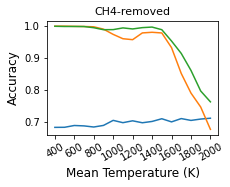

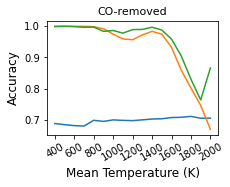

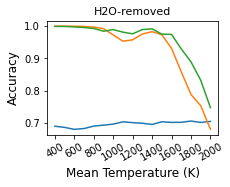

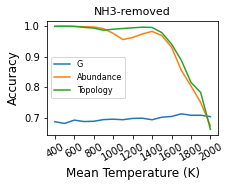

In [7]:
data_dir = "/Users/hkim78/work/2020-hotJupiter/ML/results/perturbed_data/"
dir_plot = "/Users/hkim78/work/2020-hotJupiter/plot/atmosphere-uncertainty/perturbed_data/"

mean_temp = np.arange(400, 2100, 100)

legend_label = {"f1":"G", "f2": "Abundance", "f3":"Topology", "f4":"G + Topology", "f5": "G + Abundance", 
                "f6": "Abundance + Topology", "f7":"G + Abundance + Topology"}

for removed_species in ["CH4", "CO", "H2O", "NH3"]:
    plt.figure(figsize=(3.3, 2.7))

    input_path = data_dir + "accuracy_with_perturbation_%s.json"%removed_species
    print(input_path)
    with open(input_path) as infile:
        a = json.load(infile)
     
    for i in ["f1", "f2", "f3"]: 
        plt.plot(a[i], label = legend_label[i])
    
    if removed_species == "NH3":
        plt.legend(fontsize=8)

    plt.xticks(np.arange(0, 17, 2), np.arange(400, 2100, 200), fontsize=10, rotation=30)
    plt.yticks(fontsize=10)

    plt.xlabel("Mean Temperature (K)", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title("%s-removed"%(removed_species), fontsize=11)
    plt.tight_layout()

    plt.savefig(dir_plot + "accuracy_perturbed_data_%s_three_groups.png"%removed_species, dpi=200)
    plt.savefig(dir_plot + "accuracy_perturbed_data_%s_three_groups.pdf"%removed_species)
    plt.show()
    
    
    #     
    # list_cc = ['#1E88E5', '#BB5566', '#228833']
    # 
    # plt.figure(figsize=(3.3, 2.7))
    # i = 0
    # for spread in ["50", "250", "1000"]:
    #     plt.plot(a[spread], label=spread, linewidth=2, color=list_cc[i])
    # 

    #     i += 1
    # 
    # 
    # plt.ylim([0.0,1.05])
    # # lines = plt.gca().get_lines()
    # # legend_spread = plt.legend([lines[i] for i in np.arange(0, 3)], ["50", "250", "1000"],
    # #                            prop={"size":5}, title='Spread', bbox_to_anchor=(0.0, 0.15, 0.3, 0.3))
    # legend_spread = plt.legend(prop={"size":7.5}, title='Spread')#, bbox_to_anchor=(0.05, 0.22, 0.32, 0.3))
    # plt.setp(legend_spread.get_title(), fontsize= 7.5)





